# Import

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('train.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103976 entries, 0 to 103975
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                103925 non-null  object 
 1   description            103976 non-null  object 
 2   designation            73967 non-null   object 
 3   price                  96781 non-null   float64
 4   province               103925 non-null  object 
 5   region_1               86954 non-null   object 
 6   region_2               40408 non-null   object 
 7   taster_name            83005 non-null   object 
 8   taster_twitter_handle  78994 non-null   object 
 9   title                  103976 non-null  object 
 10  variety                103975 non-null  object 
 11  winery                 103976 non-null  object 
 12  points                 103976 non-null  int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 10.3+ MB
None


In [ ]:
RANDOM_STATE = 918

# 데이터 살펴보기

## Feature Selection

In [ ]:
# string 열마다, 범주형 변수들의 class 개수 파악
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype

# 중복 제거
df = df.drop_duplicates()

# string column들만
for i in range(df.shape[1]):
    temp = df.iloc[:,i]
     
    # numeric 데이터는 살펴보지 않음
    if (is_numeric_dtype(temp)): continue

    col_name = df.columns[i]
    print('------------ ' , col_name, ' -------------')
    print(temp.value_counts().shape[0])
    print()

------------  country  -------------
43

------------  description  -------------
97550

------------  designation  -------------
32961

------------  province  -------------
407

------------  region_1  -------------
1188

------------  region_2  -------------
17

------------  taster_name  -------------
19

------------  taster_twitter_handle  -------------
15

------------  title  -------------
96761

------------  variety  -------------
676

------------  winery  -------------
15735



###어떤 데이터인가
1. 이름 데이터
    - taster_name
    - taster_twitter_handle (i와 중복)
    - title (고유값)




In [ ]:
df["taster_name"].value_counts() / sum(df["taster_name"].value_counts())*100

Roger Voss            24.907356
Michael Schachner     14.635815
Kerin O’Keefe         10.277997
Paul Gregutt           9.343164
Virginie Boone         9.106873
Matt Kettmann          6.071249
Joe Czerwinski         4.989218
Sean P. Sullivan       4.696115
Anna Lee C. Iijima     4.276473
Jim Gordon             3.916227
Anne Krebiehl MW       3.460431
Lauren Buzzeo          1.744419
Susan Kostrzewa        1.054915
Mike DeSimone          0.494532
Jeff Jenssen           0.467416
Alexander Peartree     0.386070
Carrie Dykes           0.135577
Fiona Adams            0.028407
Christina Pickard      0.007747
Name: taster_name, dtype: float64

2. 텍스트 데이터
    - description

In [ ]:
df["description"].head()

0    Possibly a little sweet, this is a soft, easyg...
1    A soft, almost off dry wine that is full in th...
2    Generic white-fruit aromas of peach and apple ...
3    This is the winery's best Nebula in years. Whi...
4    This is a very rich Pinot whose primary virtue...
Name: description, dtype: object

3. 지리 데이터
    - country
    - designation
    - province
    - region_1
    - region_2
    - winery


In [ ]:
df["country"].value_counts() / sum(df["country"].value_counts())*100

US                        42.024958
France                    17.064692
Italy                     14.974929
Spain                      5.014202
Portugal                   4.432800
Chile                      3.487382
Argentina                  2.948023
Austria                    2.509152
Australia                  1.822134
Germany                    1.679604
New Zealand                1.070517
South Africa               1.066415
Israel                     0.385550
Greece                     0.360940
Canada                     0.189699
Bulgaria                   0.108692
Hungary                    0.105616
Romania                    0.088184
Uruguay                    0.078956
Turkey                     0.070753
Slovenia                   0.068702
Georgia                    0.064600
Mexico                     0.062549
Croatia                    0.057422
England                    0.051270
Moldova                    0.049219
Brazil                     0.038965
Lebanon                    0

In [ ]:
df["province"].value_counts() / sum(df["province"].value_counts())*100

California            27.980066
Washington             6.651764
Bordeaux               4.639931
Tuscany                4.491248
Oregon                 4.130308
                        ...    
Valais                 0.001025
Hawaii                 0.001025
Goumenissa             0.001025
Commandaria            0.001025
Pitsilia Mountains     0.001025
Name: province, Length: 407, dtype: float64

In [ ]:
df["region_1"].value_counts() / sum(df["region_1"].value_counts())*100

Napa Valley                     4.172741
Columbia Valley (WA)            3.783155
Russian River Valley            2.837366
California                      2.422052
Paso Robles                     2.177029
                                  ...   
Gutturnio Classico Superiore    0.001225
La Grande Rue                   0.001225
Montlouis-sur-Loire             0.001225
Vin Doux Naturel Rasteau        0.001225
Côtes de Forez                  0.001225
Name: region_1, Length: 1188, dtype: float64

4. 재료 데이터
    - variety


In [ ]:
df["variety"].value_counts() / sum(df["variety"].value_counts())*100

Pinot Noir                  10.285949
Chardonnay                   9.044788
Cabernet Sauvignon           7.316798
Red Blend                    6.851491
Bordeaux-style Red Blend     5.352055
                              ...    
Chardonnay-Riesling          0.001025
Biancale                     0.001025
Thrapsathiri                 0.001025
Aidani                       0.001025
Gragnano                     0.001025
Name: variety, Length: 676, dtype: float64

5. 가격 데이터
    - price


In [ ]:
df["price"].describe()

count    90764.000000
mean        35.652021
std         43.356430
min          4.000000
25%         17.000000
50%         25.000000
75%         42.000000
max       3300.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'After Log Transformed')

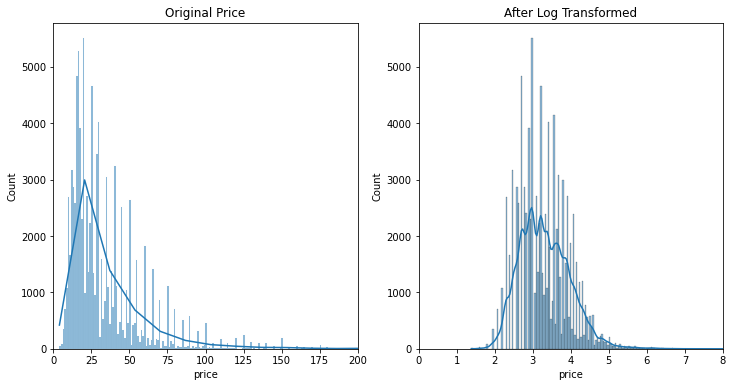

In [ ]:
temp = df['price']

fig, axes = plt.subplots(figsize = (12,6), nrows= 1, ncols = 2)

sns.histplot(x = temp, kde = True, ax = axes[0])
axes[0].set_xlim(0,200)
axes[0].set_title('Original Price')

sns.histplot(x = np.log(temp), kde = True, ax = axes[1])
axes[1].set_xlim(0,8)
axes[1].set_title('After Log Transformed')


taster_name보다 taster_twitter_handle의 결측치가 더 많다는 점   
taster_name과 taster_twitter_hanlde의 이름이 비슷한 경우가 많다는 점
그리고 비슷한 이름끼리 부여한 평균 점수도 비슷하다는 점, 즉 이름을 표현하는 방식만 다른 것으로 보인다.

따라서, 두 피쳐는 비슷한 정보를 담고 있는 것으로 이해할 수 있다.
소믈리에 중에서 트위터를 하지 않는 사람은 트위터 정보가 없으므로 twitter 피처의 결측치가 더 많은 것으로 추측된다.   
따라서, 더 많은 정보를 담고 있고 다른 하나를 포함하는 taster_name만 사용해도 될 것 같다. 

> taster_name, region_1, variety, price 데이터 선택!


6. 점수 데이터 (target)
    - points

In [ ]:
df["points"].describe()

count    97571.000000
mean        88.444497
std          3.082897
min         80.000000
25%         86.000000
50%         88.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

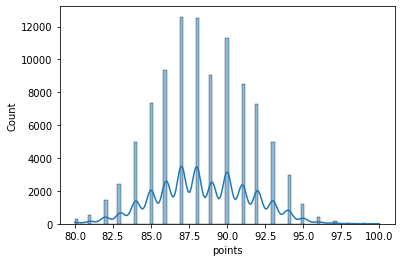

In [ ]:
temp = df['points']
sns.histplot(x = temp, kde = True)

### feature들과 points 사이의 관계

1. taster_name <-> points

In [ ]:
temp = df[['taster_name','points']]
temp.groupby('taster_name').mean().sort_values(by = 'points', ascending = False)

,points
taster_name,
Anne Krebiehl MW,90.553626
Matt Kettmann,90.027990
Virginie Boone,89.197471
Mike DeSimone,89.077647
Paul Gregutt,89.072332
Kerin O’Keefe,88.874438
Sean P. Sullivan,88.728608
Roger Voss,88.712407
Jim Gordon,88.615432


2. region_1 <-> points

In [ ]:
temp = df[['region_1','points']]
temp.groupby('region_1').mean().sort_values(by = 'points', ascending = False)

,points
region_1,
Bienvenues Bâtard-Montrachet,96.500000
Bolgheri Sassicaia,96.166667
Napa-Monterey-Mendocino,96.000000
Corton-Pougets,96.000000
Montrachet,96.000000
...,...
Penisola Sorrentina,82.500000
Catalonia,81.333333
Ramona Valley,80.500000


3. variety <-> points

In [ ]:
temp = df[['variety','points']]
temp.groupby('variety').mean().sort_values(by = 'points', ascending = False)

,points
variety,
Tinta del Pais,95.000000
Gelber Traminer,95.000000
Bual,94.400000
Riesling-Chardonnay,94.000000
Sercial,94.000000
...,...
Aidani,82.000000
Picapoll,82.000000
Airen,81.666667


3. price <-> points

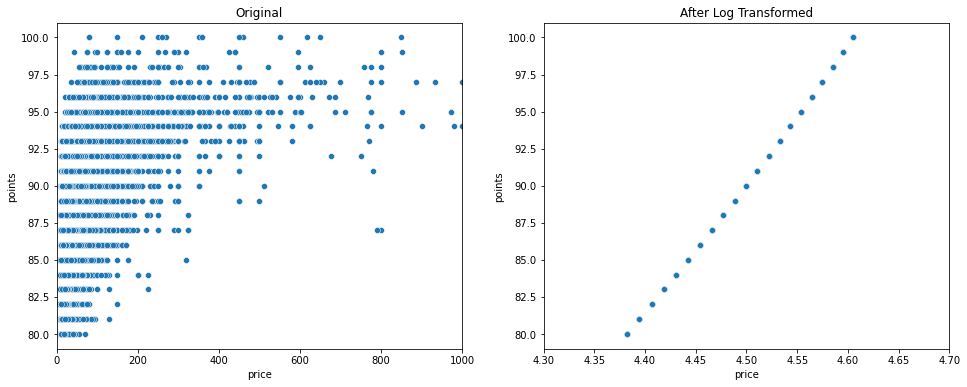

In [ ]:
# 산점도

temp = df[["price", "points"]]
temp2 = temp.copy()
temp2['price'] = np.log(temp2['points'])

fig, axes = plt.subplots(figsize = (16,6), nrows=1, ncols = 2)

sns.scatterplot(x = 'price', y='points', data = temp, ax = axes[0])
axes[0].set_title('Original')
axes[0].set_xlim(0,1000)

sns.scatterplot(x='price', y='points', data = temp2, ax = axes[1])
axes[1].set_title('After Log Transformed')
axes[1].set_xlim(4.3,4.7)

plt.xlabel('price')
plt.ylabel('points')

plt.show()

#### log(price) * $ \beta $ = points  



In [ ]:
# Correlation
print('Original Prcie : ')
print(temp.corr(), '\n')

print('After Log Transformed: ')
print(temp2.corr())

Original Prcie : 
           price    points
price   1.000000  0.406177
points  0.406177  1.000000 

After Log Transformed: 
           price    points
price   1.000000  0.999749
points  0.999749  1.000000


# PreProcessing

In [ ]:
# feature selection
temp = df[['region_1', 'price', 'taster_name', 'variety', 'points']]
# 결측치 레코드 제거
temp.dropna(axis = 0, inplace = True)

print(temp.head())
print(temp.info())

                                            region_1  price  \
0                            South Eastern Australia    5.0   
1                                     Côtes du Rhône   12.0   
2                                              Rueda    9.0   
5  Sonoma County-Monterey County-Santa Barbara Co...   22.0   
6                                  Willamette Valley   33.0   

         taster_name        variety  points  
0     Joe Czerwinski     Chardonnay      83  
1         Roger Voss           Rosé      85  
2  Michael Schachner  Verdejo-Viura      86  
5         Jim Gordon     Chardonnay      90  
6       Paul Gregutt     Pinot Noir      90  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 57552 entries, 0 to 103975
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region_1     57552 non-null  object 
 1   price        57552 non-null  float64
 2   taster_name  57552 non-null  object 
 3   variety      57552 no

In [ ]:
X = temp.drop('points', axis=  1)
y = temp['points']

In [ ]:
# 원본 저장
origin = X.copy()

## OneHotEncoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe_region_1 = OneHotEncoder(handle_unknown = 'ignore')
ohe_taster_name = OneHotEncoder(handle_unknown = 'ignore')
ohe_variety = OneHotEncoder(handle_unknown = 'ignore')

# 범주형 변수 3개 원핫 인코딩 (결과값은 np.array)
region_1_np = ohe_region_1.fit_transform(X[['region_1']])
taster_name_np = ohe_taster_name.fit_transform(X[['taster_name']])
variety_np = ohe_variety.fit_transform(X[['variety']])


In [ ]:
# np.array dataframe으로 변환
region_1_df = pd.DataFrame.sparse.from_spmatrix(region_1_np, columns=['region_1_' + col for col in ohe_region_1.categories_[0]])
region_1_df.reset_index(drop=True, inplace = True)

taster_name_df = pd.DataFrame.sparse.from_spmatrix(taster_name_np, columns=['taster_' + col for col in ohe_taster_name.categories_[0]])
taster_name_df.reset_index(drop=True, inplace = True)

variety_df = pd.DataFrame.sparse.from_spmatrix(variety_np, columns=['variety_' + col for col in ohe_variety.categories_[0]])
variety_df.reset_index(drop=True, inplace = True)


X_price = X.drop(['region_1', 'taster_name', 'variety'], axis=1)
X_price.reset_index(drop=True, inplace = True)

# one hot encoding 한거 다 합치기
X = pd.concat([X_price, region_1_df, taster_name_df, variety_df], axis=1)

In [ ]:
X_ohe = X.copy()

+ price 아웃라이어 제거

Before : 
count    57552.000000
mean        37.236134
std         47.439318
min          4.000000
25%         18.000000
50%         27.000000
75%         45.000000
max       3300.000000
Name: price, dtype: float64

After : 
count    54659.000000
mean        30.896065
std         17.488672
min          4.000000
25%         18.000000
50%         25.000000
75%         40.000000
max         88.000000
Name: price, dtype: float64 



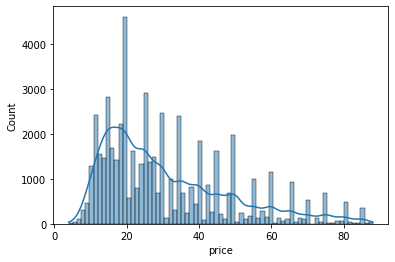

In [ ]:
# price에 너무 큰 아웃라이어가 있다.
# 0.95 정도로 제거하면 아웃라이어 처리 완료

temp = X['price']
print( 'Before : ')
print(temp.describe())
print()
print('After : ')
temp = temp[temp < temp.quantile(0.95)]

print(temp.describe(), '\n')

sns.histplot(x = temp, kde = True)

In [ ]:
# Price 아웃라이어 정리
y.reset_index(drop=True, inplace= True)
boolean_index = X['price'] < X['price'].quantile(0.95)
X = X[boolean_index]
y = y[boolean_index]

### Data Split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = RANDOM_STATE)

In [ ]:
# 인덱스가 더러워져서, 인덱스 처리
X.reset_index(drop = True, inplace = True)
y.reset_index(drop = True, inplace = True)
X_train.reset_index(drop = True, inplace = True)
X_val.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace=  True)
y_val.reset_index(drop= True, inplace = True)

In [ ]:
print(X.info())
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54659 entries, 0 to 54658
Columns: 1517 entries, price to variety_Zweigelt
dtypes: Sparse[float64, 0](1516), float64(1)
memory usage: 2.3 MB
None
(54659,)


# Training

### Import

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

### metric_function

+ eval_kfold()   

자동으로 5 fold evaluation 해주는  cross_vale_score 함수를 이용   
mse, rmse, 평균 rmse를 출력



In [ ]:
def eval_kfold(model ,X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores) 

    print('Each Negative MSE scores : ', np.round(neg_mse_scores, 2))
    print('Each RMSE scores : ', np.round(rmse_scores, 2))
    print(f'AVG RMSE : {avg_rmse:.2f}')



## Linear Regression

### Basic Linear Regression

우선 선형회귀를 적용해보자

In [ ]:
lr = LinearRegression()
eval_kfold(lr, X, y)

Each Negative MSE scores :  [-1.07663198e+15 -1.42906196e+18 -2.07734237e+17 -8.34351022e+17
 -5.51511152e+18]
Each RMSE scores :  [3.28120706e+07 1.19543379e+09 4.55778715e+08 9.13428170e+08
 2.34842746e+09]
AVG RMSE : 989176041.38


결과가 상당히 안좋다. 원인이 무엇일까? 우선 계수들을 살펴보자   
계수들을 절대값이 큰 순서대로 정렬해보았다.

계수들이 엄청나게 크다 과적합의 의심된다.   
직접 모델을 돌려보고 train데이터와 test(validation)데이터에서의 성능 차이를 살펴보자

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train) # 학습
y_train_preds = lr.predict(X_train) # 학습한 데이터와 같은 데이터로 예측
y_val_preds = lr.predict(X_val) # validation set 데이터로 예측

train_set_mse = mean_squared_error(y_pred = y_train_preds, y_true = y_train) 
val_set_mse = mean_squared_error(y_pred = y_val_preds, y_true = y_val)

print(f'Train set MSE : {train_set_mse:.2f}')
print(f'Validation set MSE : {val_set_mse:.2f}')

Train set MSE : 4.60
Validation set MSE : 28113251932633636864.00


엄청나게 과적합 되어 있는 것을 확인할 수 있다.    
Regularization을 적용하자.

그전에, price가 좌편향 되어있었으므로, 로그변환을 적용해보자

X_log <- 로그 적용 후 데이터

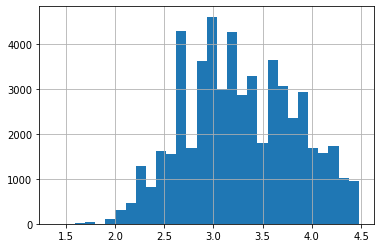

In [ ]:
X_log = X.copy()
X_log['price'] = np.log(X_log['price'])
X_log['price'].hist(bins = 30)

In [ ]:
lr = LinearRegression()
eval_kfold(lr, X_log, y)

Each Negative MSE scores :  [-3.08721986e+19 -1.29519769e+20 -8.72743455e+20 -1.40196645e+21
 -8.92002607e+20]
Each RMSE scores :  [5.55627560e+09 1.13806753e+10 2.95422317e+10 3.74428424e+10
 2.98664127e+10]
AVG RMSE : 22757687531.68


훨씬 정규분포에 가까워진 모습이다.   
하지만 아직 정규화를 하지 않았기 때문에 과적합 문제가 해결되지 않았다.  
정규화를 시작해보자

### Regularization

+ Ridge, Lasso, ElasticNet 사용

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

우선, 로그 변환이 유효한지 보기위해 기본 모델로 비교를 해보았다.

In [ ]:
ridge = Ridge(alpha = 10)
print('Log Transformed : ')
eval_kfold(ridge, X_log, y)
print()
print('Original: ')
eval_kfold(ridge, X, y)

Log Transformed : 
Each Negative MSE scores :  [-4.57 -4.75 -4.75 -4.76 -4.72]
Each RMSE scores :  [2.14 2.18 2.18 2.18 2.17]
AVG RMSE : 2.17

Original: 
Each Negative MSE scores :  [-4.73 -4.87 -4.88 -4.93 -4.86]
Each RMSE scores :  [2.17 2.21 2.21 2.22 2.2 ]
AVG RMSE : 2.20


log 변환이 조금 더 성능이 좋아보인다. 앞으로는 로그 데이터 값으로만 진행하려고 한다.

In [ ]:
# Regularization 적용시 사용할 평가 함수
def linear_reg_model_eval(model_name, alphas, X_data, y_target) :

    print('--------------- ', model_name, ' ---------------')

    for alpha in alphas:
        if model_name == 'Ridge' : model = Ridge(alpha = alpha)
        elif model_name == 'Lasso' : model = Lasso(alpha= alpha)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha = alpha, l1_ratio = 0.7)
        else : 
            print('Invalid model name!'); return;

        print('alpha = ', alpha, ' )')
        eval_kfold(model, X_data, y)
        print()


In [ ]:
# 사용할 alpha 값
alphas = [0.07, 0.1, 0.5, 1, 3, 5, 10]

In [ ]:
# Ridge
linear_reg_model_eval('Ridge', alphas, X_log, y)

---------------  Ridge  ---------------
alpha =  0.07  )
Each Negative MSE scores :  [-4.6  -4.77 -4.76 -4.77 -4.75]
Each RMSE scores :  [2.15 2.18 2.18 2.18 2.18]
AVG RMSE : 2.18

alpha =  0.1  )
Each Negative MSE scores :  [-4.6  -4.77 -4.75 -4.77 -4.75]
Each RMSE scores :  [2.15 2.18 2.18 2.18 2.18]
AVG RMSE : 2.17

alpha =  0.5  )
Each Negative MSE scores :  [-4.58 -4.76 -4.74 -4.76 -4.73]
Each RMSE scores :  [2.14 2.18 2.18 2.18 2.18]
AVG RMSE : 2.17

alpha =  1  )
Each Negative MSE scores :  [-4.57 -4.75 -4.73 -4.75 -4.72]
Each RMSE scores :  [2.14 2.18 2.18 2.18 2.17]
AVG RMSE : 2.17

alpha =  3  )
Each Negative MSE scores :  [-4.56 -4.74 -4.73 -4.75 -4.71]
Each RMSE scores :  [2.14 2.18 2.17 2.18 2.17]
AVG RMSE : 2.17

alpha =  5  )
Each Negative MSE scores :  [-4.56 -4.74 -4.73 -4.75 -4.71]
Each RMSE scores :  [2.14 2.18 2.18 2.18 2.17]
AVG RMSE : 2.17

alpha =  10  )
Each Negative MSE scores :  [-4.57 -4.75 -4.75 -4.76 -4.72]
Each RMSE scores :  [2.14 2.18 2.18 2.18 2.17]
AVG

In [ ]:
linear_reg_model_eval('Lasso', alphas, X_log, y)

---------------  Lasso  ---------------
alpha =  0.07  )
Each Negative MSE scores :  [-5.3  -5.46 -5.46 -5.5  -5.48]
Each RMSE scores :  [2.3  2.34 2.34 2.34 2.34]
AVG RMSE : 2.33

alpha =  0.1  )
Each Negative MSE scores :  [-5.34 -5.51 -5.5  -5.54 -5.53]
Each RMSE scores :  [2.31 2.35 2.35 2.35 2.35]
AVG RMSE : 2.34

alpha =  0.5  )
Each Negative MSE scores :  [-6.13 -6.23 -6.29 -6.36 -6.33]
Each RMSE scores :  [2.47 2.5  2.51 2.52 2.52]
AVG RMSE : 2.50

alpha =  1  )
Each Negative MSE scores :  [-8.15 -8.2  -8.32 -8.42 -8.38]
Each RMSE scores :  [2.85 2.86 2.88 2.9  2.89]
AVG RMSE : 2.88

alpha =  3  )
Each Negative MSE scores :  [-8.15 -8.2  -8.32 -8.42 -8.38]
Each RMSE scores :  [2.85 2.86 2.88 2.9  2.89]
AVG RMSE : 2.88

alpha =  5  )
Each Negative MSE scores :  [-8.15 -8.2  -8.32 -8.42 -8.38]
Each RMSE scores :  [2.85 2.86 2.88 2.9  2.89]
AVG RMSE : 2.88

alpha =  10  )
Each Negative MSE scores :  [-8.15 -8.2  -8.32 -8.42 -8.38]
Each RMSE scores :  [2.85 2.86 2.88 2.9  2.89]
AVG

In [ ]:
linear_reg_model_eval('ElasticNet', alphas, X_log, y)

---------------  ElasticNet  ---------------
alpha =  0.07  )
Each Negative MSE scores :  [-5.28 -5.44 -5.44 -5.47 -5.46]
Each RMSE scores :  [2.3  2.33 2.33 2.34 2.34]
AVG RMSE : 2.33

alpha =  0.1  )
Each Negative MSE scores :  [-5.34 -5.5  -5.5  -5.54 -5.53]
Each RMSE scores :  [2.31 2.35 2.35 2.35 2.35]
AVG RMSE : 2.34

alpha =  0.5  )
Each Negative MSE scores :  [-6.27 -6.37 -6.43 -6.5  -6.47]
Each RMSE scores :  [2.5  2.52 2.54 2.55 2.54]
AVG RMSE : 2.53

alpha =  1  )
Each Negative MSE scores :  [-7.48 -7.54 -7.65 -7.74 -7.71]
Each RMSE scores :  [2.73 2.75 2.77 2.78 2.78]
AVG RMSE : 2.76

alpha =  3  )
Each Negative MSE scores :  [-8.15 -8.2  -8.32 -8.42 -8.38]
Each RMSE scores :  [2.85 2.86 2.88 2.9  2.89]
AVG RMSE : 2.88

alpha =  5  )
Each Negative MSE scores :  [-8.15 -8.2  -8.32 -8.42 -8.38]
Each RMSE scores :  [2.85 2.86 2.88 2.9  2.89]
AVG RMSE : 2.88

alpha =  10  )
Each Negative MSE scores :  [-8.15 -8.2  -8.32 -8.42 -8.38]
Each RMSE scores :  [2.85 2.86 2.88 2.9  2.89

전반적으로 Ridge 모델이 더 성능이 좋다.   alpha값에 따른 성능차이는 크게 없었기 때문에 alpha값을 임의로 잡아서,

Ridge(alpha = 1)인 모델을 이후에 테스트 데이터를 예측하는데 사용해보기로 했다.

## Decision Tree Regression

1. 결정 트리 기반 다양한 앙상블 알고리즘 우선 기본 파라미터로 테스트

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
dt = DecisionTreeRegressor(random_state = RANDOM_STATE, max_depth = 5) #decision tree
rf = RandomForestRegressor(random_state = RANDOM_STATE, n_estimators = 10) #random forest(based on decision tree)
gb = GradientBoostingRegressor(random_state = RANDOM_STATE, n_estimators = 10) # gradient boosting
xgb = XGBRegressor(n_estimators = 10) # xgboost
lgb = LGBMRegressor(n_estimators = 10) #light gradient boosting machine

models = [dt, rf, gb, xgb, lgb]
model_names = [
    'Decision Tree Regressor',
    'RandomForestRegressor',
    'Gradient Boosting Regressor',
    'XGBoost Regressor',
    'Light Gradient Boosting Regressor'
]

In [ ]:
for model, model_name in zip(models, model_names):
    print('-------------------- ' , model_name , ' ---------------------')
    eval_kfold(model, X, y)
    print()

--------------------  Decision Tree Regressor  ---------------------
Each Negative MSE scores :  [-5.1  -5.31 -5.31 -5.31 -5.27]
Each RMSE scores :  [2.26 2.3  2.3  2.3  2.3 ]
AVG RMSE : 2.29

--------------------  RandomForestRegressor  ---------------------
Each Negative MSE scores :  [-5.1  -5.24 -5.28 -5.32 -5.2 ]
Each RMSE scores :  [2.26 2.29 2.3  2.31 2.28]
AVG RMSE : 2.29

--------------------  Gradient Boosting Regressor  ---------------------
Each Negative MSE scores :  [-5.58 -5.73 -5.75 -5.81 -5.77]
Each RMSE scores :  [2.36 2.39 2.4  2.41 2.4 ]
AVG RMSE : 2.39

--------------------  XGBoost Regressor  ---------------------
Each Negative MSE scores :  [nan nan nan nan nan]
Each RMSE scores :  [nan nan nan nan nan]
AVG RMSE : nan

--------------------  Light Gradient Boosting Regressor  ---------------------
Each Negative MSE scores :  [nan nan nan nan nan]
Each RMSE scores :  [nan nan nan nan nan]
AVG RMSE : nan



성능이 제일 좋은 RandomForest을 하이퍼 파라미터 튜닝해보자


In [ ]:
rf = RandomForestRegressor()
params = {
    'n_estimators' : [5,10,15], # 몇개의 모델을 통해 voting할지
    'max_features' : ['auto', 'sqrt', 'log2'], # 트리 분할할 때 살펴볼 피쳐 개수
    'max_depth' : [4,6,8], # 트리 최대 깊이
}

grid_rf = GridSearchCV(RandomForestRegressor(), param_grid = params, cv = 5)

In [ ]:
grid_rf.fit(X_log, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10, 15]})

In [ ]:
print('best params : ', grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

best params :  {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 15}


# Test

## 0) Training data와 같은 전처리

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25995 entries, 0 to 25994
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                25983 non-null  object 
 1   description            25995 non-null  object 
 2   designation            18539 non-null  object 
 3   price                  24194 non-null  float64
 4   province               25983 non-null  object 
 5   region_1               21770 non-null  object 
 6   region_2               10103 non-null  object 
 7   taster_name            20722 non-null  object 
 8   taster_twitter_handle  19764 non-null  object 
 9   title                  25995 non-null  object 
 10  variety                25995 non-null  object 
 11  winery                 25995 non-null  object 
dtypes: float64(1), object(11)
memory usage: 2.4+ MB


In [ ]:
temp = df_test[['region_1', 'price', 'taster_name', 'variety' ]]
X_test = temp.copy()
X_test['price'] = X_test["price"].fillna(X_test["price"].median(skipna=True))
X_test.fillna(method='bfill', inplace = True)


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25995 entries, 0 to 25994
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region_1     25995 non-null  object 
 1   price        25995 non-null  float64
 2   taster_name  25995 non-null  object 
 3   variety      25995 non-null  object 
dtypes: float64(1), object(3)
memory usage: 812.5+ KB


In [ ]:
# 범주형 변수 3개 원핫 인코딩 (결과값은 np.array)
region_1_np = ohe_region_1.transform(X_test[['region_1']])
taster_name_np = ohe_taster_name.transform(X_test[['taster_name']])
variety_np = ohe_variety.transform(X_test[['variety']])

In [ ]:
# np.array dataframe으로 변환
region_1_df = pd.DataFrame.sparse.from_spmatrix(region_1_np, columns=['region_1_' + col for col in ohe_region_1.categories_[0]])
region_1_df.reset_index(drop=True, inplace = True)

taster_name_df = pd.DataFrame.sparse.from_spmatrix(taster_name_np, columns=['taster_' + col for col in ohe_taster_name.categories_[0]])
taster_name_df.reset_index(drop=True, inplace = True)

variety_df = pd.DataFrame.sparse.from_spmatrix(variety_np, columns=['variety_' + col for col in ohe_variety.categories_[0]])
variety_df.reset_index(drop=True, inplace = True)


X_price = X_test.drop(['region_1', 'taster_name', 'variety'], axis=1)
X_price.reset_index(drop=True, inplace = True)

# one hot encoding 한거 다 합치기
X_test = pd.concat([X_price, region_1_df, taster_name_df, variety_df], axis=1)

In [ ]:
# 로그변환
X_test['price'] = np.log(X_test['price'])

## 1) Ridge(alpha =1)

In [ ]:
from sklearn.linear_model import Ridge
lr = Ridge(alpha = 1)

lr.fit(X_log, y)
ridge_pred = lr.predict(X_test)


In [ ]:
print(ridge_pred[:10])
ridge_pred.to_csv('ridge_pred.csv') # csv로 저장

array([87.13005014, 89.49666223, 89.22782344, ..., 89.05559096,
       93.78133285, 89.49898406])

계수들을 살펴보자

Intercept : 78.96
region_1_Ramona Valley                   -4.89
variety_Tempranillo Blanco               -4.09
region_1_Sierra Pelona Valley            -4.06
region_1_Vino de Calidad de Valtiendas   -3.84
region_1_Madiran                          3.77
variety_Tinta del Pais                    3.55
variety_Picapoll                         -3.47
variety_Sirica                            3.16
region_1_Vino de la Tierra de Zamora     -3.11
region_1_Val di Cornia Suvereto          -3.07
dtype: float64


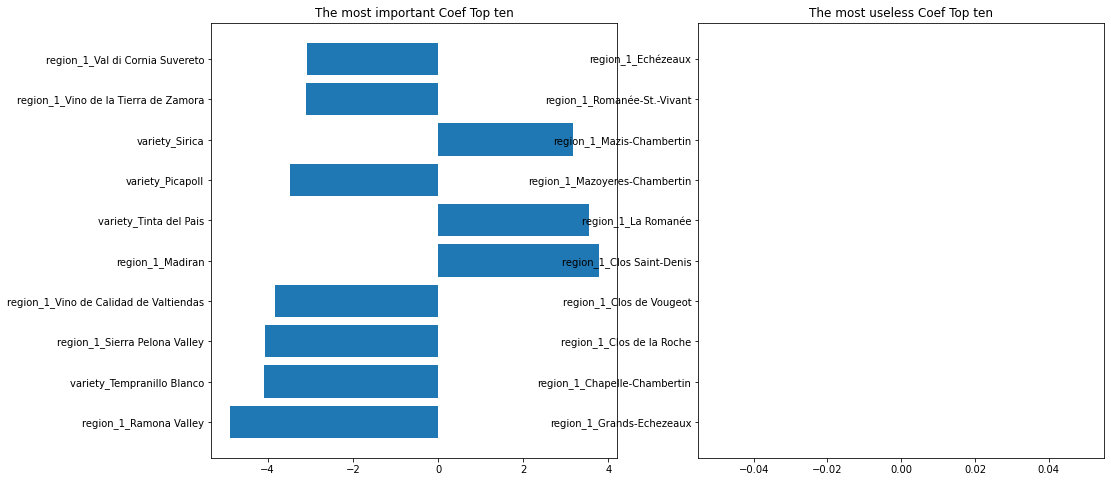

In [ ]:
print(f'Intercept : {lr.intercept_:.2f}')

# 계수들을 절대값 큰 순서대로 정렬
# 그 중 10개 관찰
coeff = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)

coeff_abs = np.abs(coeff.copy()) # 절대값 씌우기
sorted_index = coeff_abs.sort_values(ascending = False).index # 절대값 씌운 상태로 내림차순 정렬 후 인덱스 추출
sorted_index2 = coeff_abs.sort_values(ascending = True).index # 절대값 씌운 상태로 오름차순 정렬 후 인덱스 추출

print(coeff[sorted_index[:10]]) # 추출한 인덱스로 계수 절대값 큰 순서대로

fig, axes = plt.subplots(figsize = (16,8), nrows = 1, ncols = 2)

axes[0].set_title('The most important Coef Top ten')
axes[1].set_title('The most useless Coef Top ten')

axes[0].barh(sorted_index[:10], coeff[sorted_index[:10]])
axes[1].barh(sorted_index2[:10], coeff[sorted_index2[:10]])

plt.show()

와인의 평점에 영향을 많이 미치는 feature들과 영향이 작은 feature들을 확인할 수 있었으나,<br>
각 feature에 해당하는 표본이 적어 나타난 결과로 보이기에 한계가 있음.

## 2) RandomForestRegressor

In [ ]:
# 위에서 구한 best_rf 사용
# parameter : {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 15}
rf_pred = best_rf.predict(X_test)

In [ ]:
rf_pred[:10]
rf_pred.to_csv('rf_pred.csv') # csv로 저장

array([86.9573498 , 90.38607838, 90.2838293 , 88.18104514, 87.80539597,
       88.14128302, 88.18104514, 86.97704016, 85.1163391 , 84.96394403])

제일 중요한 피쳐 10개를 살펴보자

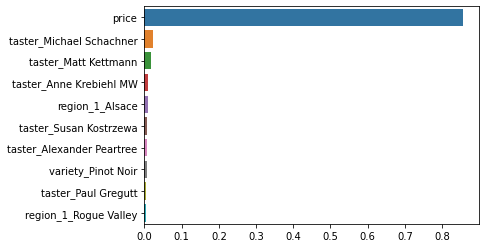

In [ ]:
feature_series = pd.Series(data = best_rf.feature_importances_, index = X_log.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series[:10], y = feature_series.index[:10])

price의 중요도가 압도적으로 높게 나타났다.<br>
그러나 taster, region등의 feature 단위로 종합했을 때의 결과는 어떨지 확인할 필요가 있다.

### 3) Basic Decision Tree Regessor

In [ ]:
dt = DecisionTreeRegressor(random_state = RANDOM_STATE, max_depth = 5)

dt.fit(X_log, y)

dt_pred = dt.predict(X_test)

In [ ]:
print(dt_pred[:10])
dt_pred.to_csv('dt_pred.csv') # csv로 저장

마차가지로 제일 중요한 피쳐 10개를 살펴보자

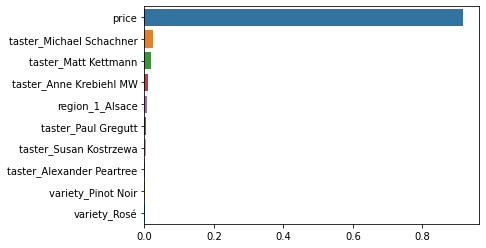

In [ ]:
feature_series = pd.Series(data = dt.feature_importances_, index = X_log.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series[:10], y = feature_series.index[:10])

price의 중요도가 압도적으로 높게 나타났다.<br>
그러나 taster, region등의 feature 단위로 종합했을 때의 결과는 어떨지 확인할 필요가 있다.

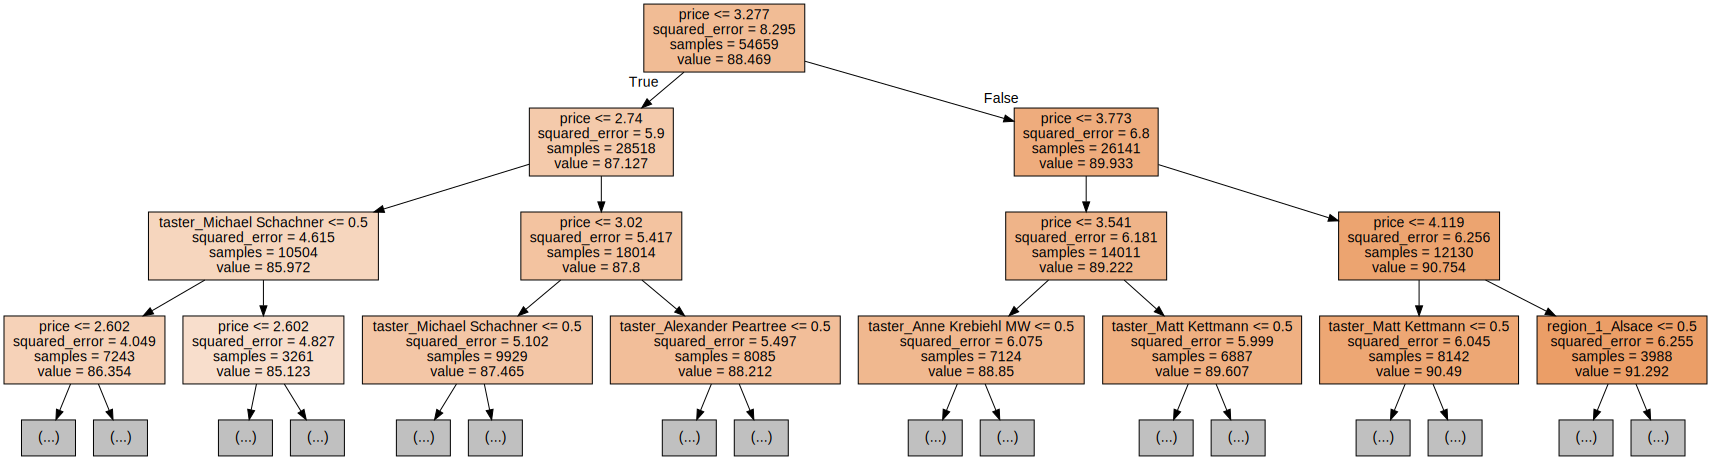

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(dt, out_file ='tree.dot', 
                feature_names = X_log.columns, 
                impurity = True, 
                filled = True,
                precision = 3,
                max_depth = 3)

with open('tree.dot') as f:
    graph = f.read()
graphviz.Source(graph)

Decision Tree의 상위 depth에 모두 price가 기준인 것으로 보아,<br>
우선 price가 와인의 평점을 예측하는 데 가장 큰 요인인 것을 확인할 수 있었다.

## Insights, 모델의 활용

와인 제조업자
- 각 요소별 가중치를 통해 평점이 높은 와인을 만들기 위한 지역, 포도의 종류, 평가를 받을 테이스터 등을 결정하는 데 활용할 수 있다.
- 점수가 낮은 와인에 대해 모델에서 좋은 점수에 영향을 미쳤던 feature들을 통해 문제점을 파악 및 개선할 수 있다.


도매상(B2B)
- 와인을 매입할 때, 와인에 대한 정보를 바탕으로 가격과 점수를 미리 예측(log Price와 Points가 선형관계를 보이므로)해서 제조업자가 예측된 가격보다 와인을 과대 평가하고 가격을 높게 팔려고 한다면 사지 않고, 제조업자가 예측된 점수보다 와인을 과소평가해서 싸게 팔려고 한다면 다량 매입하는 전략을 사용할 수 있다. (정보 비대칭의 해소)


판매 기업(B2C)
- Points가 높은 와인이 Price가 낮거나, 에서 Points가 낮은 와인이 Price가 너무 높게 측정되었을 때 가격 정책을 다시 수립하는 데 활용할 수 있다.
- 제조한 와인의 promotion에 있어, 높은 점수에 유리한 요소는 강조하고, 불리한 요소는 숨기는 전략을 활용할 수 있다.


추가 필요 데이터
- Points가 맛, 향, 외관 등 더욱 세분화되어 있다면 와인의 개선을 위해 모델을 활용하는 데 더욱 도움이 될 것 같다.
- 와인의 숙성 년도 등 와인의 평점에 영향을 미칠 것으로 보이는 요소들이 추가되면 더욱 좋을 것이다.
- 매출 데이터가 있다면 points 및 각종 변수와의 관계 파악을 통해 사업적으로 더욱 유의미한 모델을 만들 수 있을 것이다.
